# This is Notebook for Gradient

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_img(img):
    flt = plt.figure(figsize=(12,10))
    ax = flt.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
# when 2nd parameter is used this image is read in gray scale
img = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sudoku.jpg',0)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

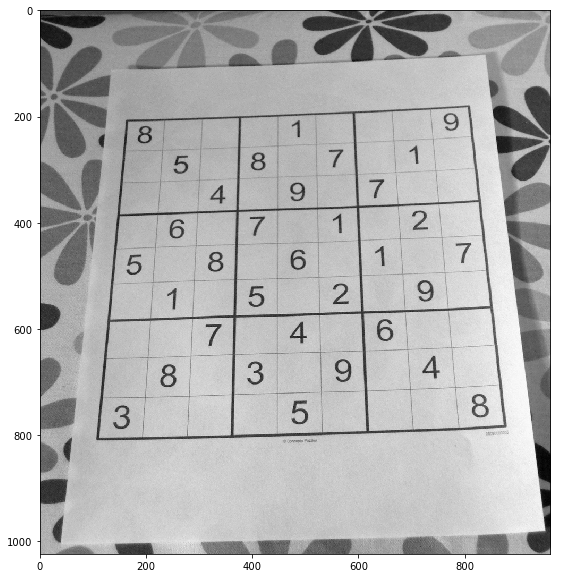

In [4]:
display_img(img)

# How to use Sobel Operator using opencv

## Let us try X-Gradient (Here, you should only see vertical lines)

In [50]:
'''
ddepth : usually we take this as -1 because we want output image pixel to be same as input. Or we can choose what ever we want.
Here we will choose ddepth as cv2.CV_64F (highest precision - this can be 8/24/32 etc)

dx = 1 ( since we are calculating the x gradient)

dy = 0 (keep y gradient zero)
'''
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0, ksize=3)

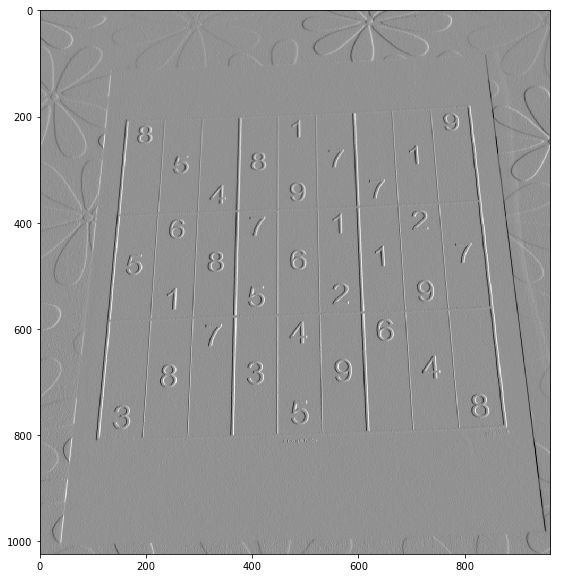

In [51]:
display_img(sobelx)

## Let us try Y-Gradient (Here, you should only see Horizontal lines)

In [52]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

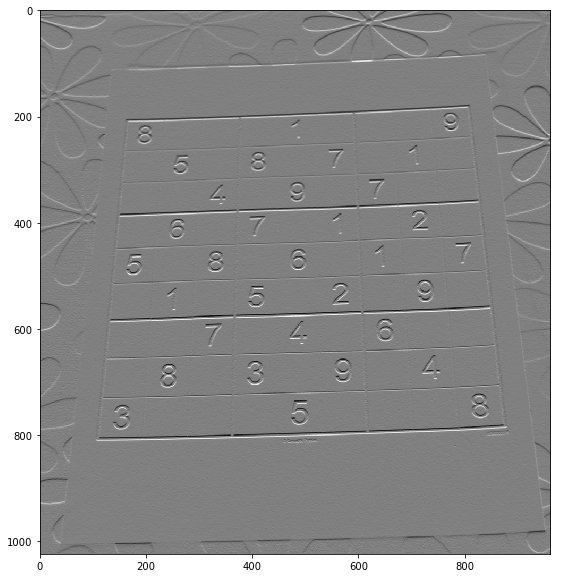

In [53]:
display_img(sobely)

# Let us use Laplacean Gradient

## This is the 2nd derivative of the function f over x + 2nd derivative of the function f over y

In [54]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

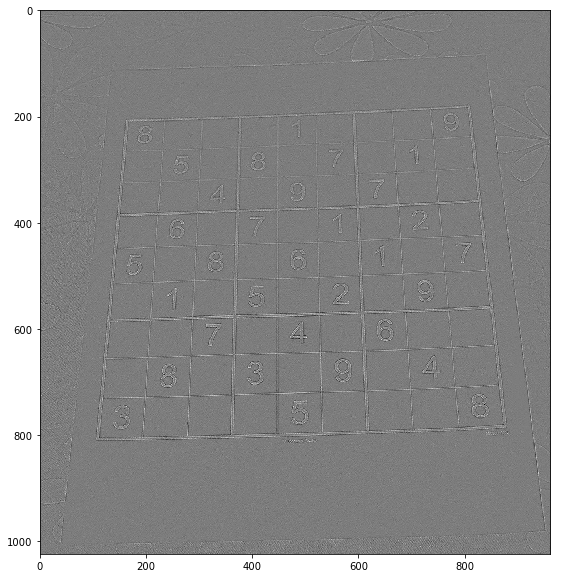

In [55]:
display_img(laplacian)

##### In the above image we can clearly see the edge detection done fairly better (mostly a gradient detection on x and y)

# Let us try Blended concept

#### Here let us try to combine image from sobel of x and y gradient with the image of laplacian

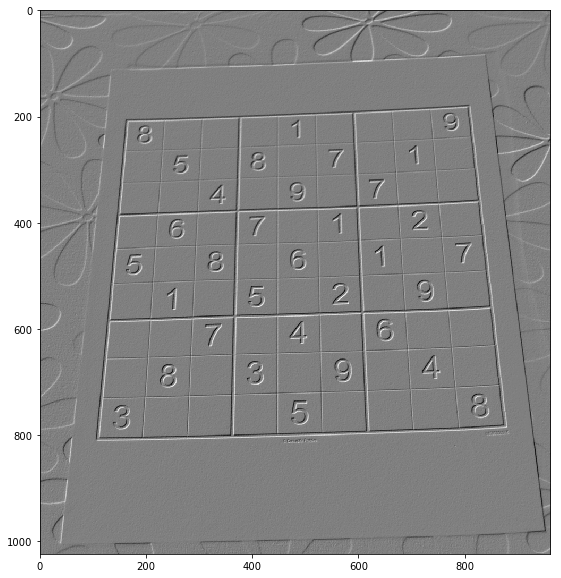

In [57]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=10)
display_img(blended)

### Let us provide some sort of threshold on this image

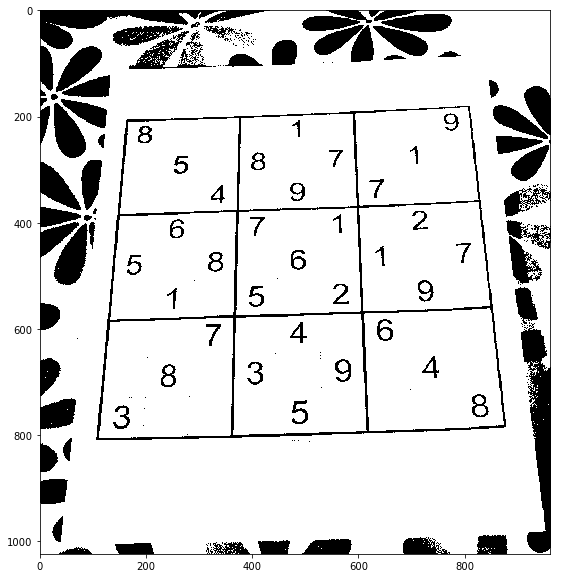

In [58]:
ret_thr,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
display_img(th1)

## Let us use morphological operator on the blended image and see how the gradient works

In [59]:
kernel = np.ones(shape=(3,3),dtype=np.uint8)

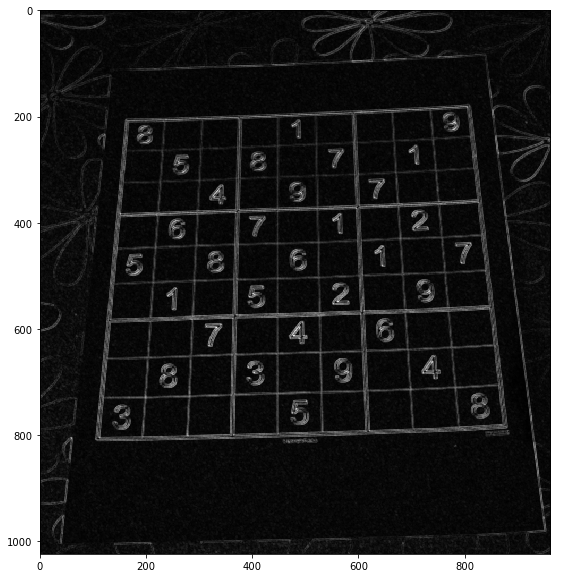

In [61]:
grad = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(grad)

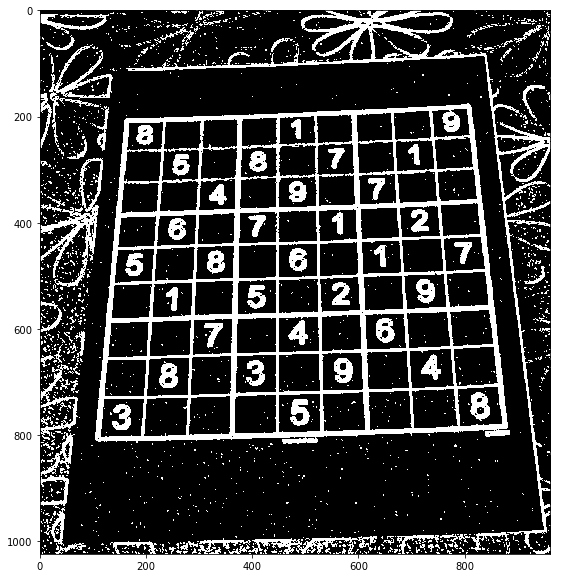

In [72]:
ret_thr,th1 = cv2.threshold(grad,45,255,cv2.THRESH_BINARY)
display_img(th1)

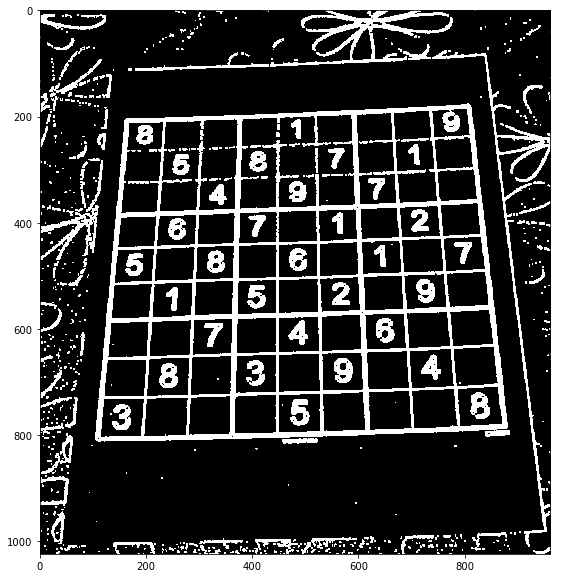

In [73]:
opening = cv2.morphologyEx(th1,cv2.MORPH_OPEN,kernel)
display_img(opening)

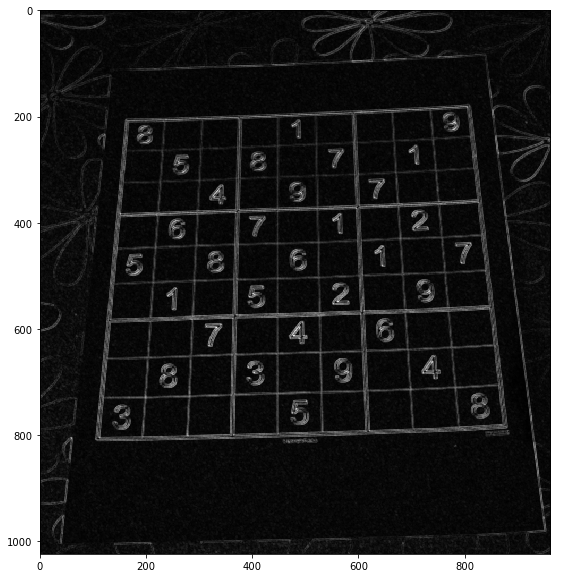

In [74]:
kernel = np.ones(shape=(3,3),dtype=np.uint8)
grad1 = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(grad1)

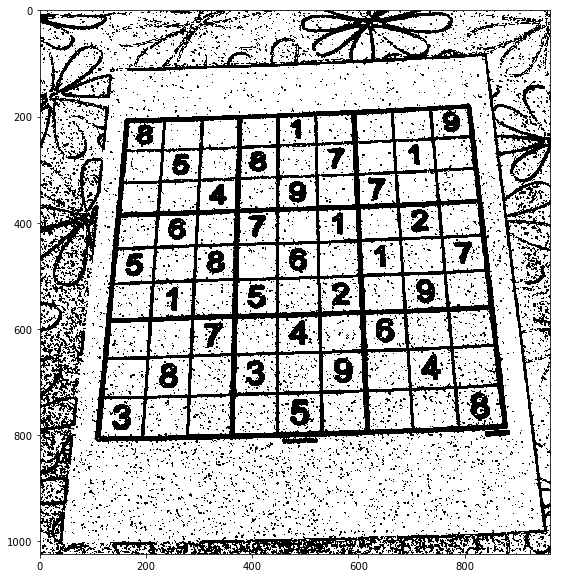

In [77]:
ret_thr,th1 = cv2.threshold(grad,35,255,cv2.THRESH_BINARY_INV)
display_img(th1)

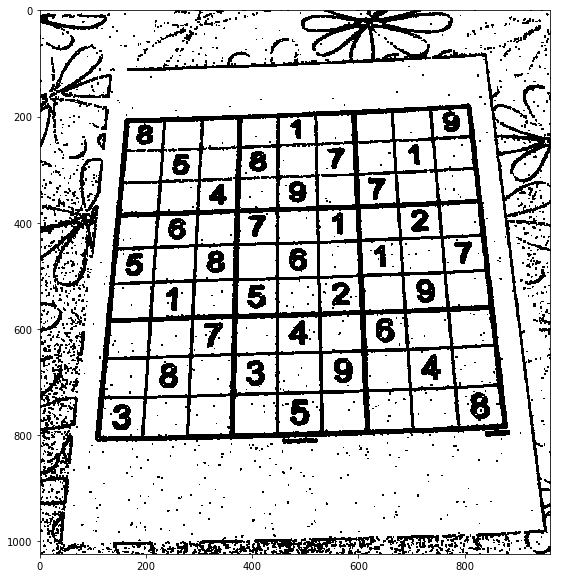

In [78]:
close = cv2.morphologyEx(th1,cv2.MORPH_CLOSE,kernel)
display_img(close)

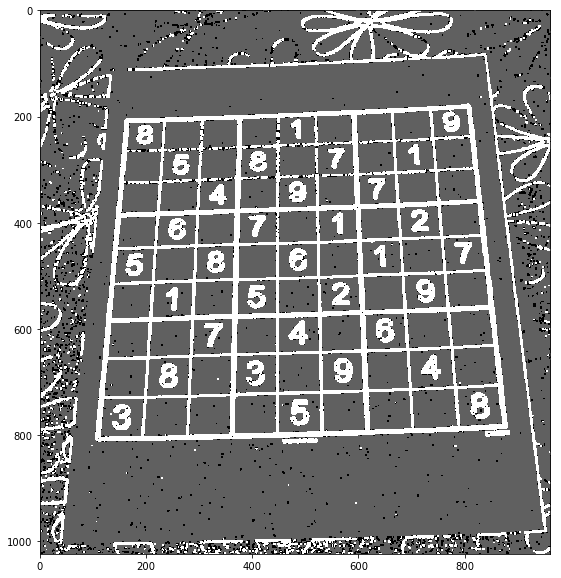

In [84]:
blended_thre = cv2.addWeighted(src1=opening,alpha=0.8,src2=close,beta=0.3,gamma=1)
display_img(blended_thre)